# cross-section results
after applying the correction for $\phi_\mu \sim 0$ and $\phi_p \sim 0$

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *

%matplotlib inline
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/paper-CCQEXSec/Figures/overlay_8.11/'

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [2]:
afro_genie_CC1p_dict = dict()
path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/afro_genie_samples/'
for gname in genie_list: 
    csvfilename = Paths['selected events'] + 'afro_genie_CC1p_' + gname + '.csv'
    if os.path.isfile( csvfilename ):#{
        afro_genie_CC1p_dict[gname] = pd.read_csv(csvfilename)
        print 'loaded',len(afro_genie_CC1p_dict[gname]),'afro GENIE CC1p '+gname+' events'
    #}
    else: #{
        afro_genie = pd.read_csv( path + 'CC_4_9E20_POT_mA_0_99'+'_'+gname+'.csv')
        print 'loaded',gname
        afro_genie_contained = afro_genie[(afro_genie.IsCC_1p_200MeVc==True)
                            & ((afro_genie.v_x>3) & (afro_genie.v_x<256))                        
                            & ((afro_genie.v_y>-115) & (afro_genie.v_y<115))                        
                            & ((afro_genie.v_z>5) & (afro_genie.v_z<1037))                        
                           ]
        afro_genie_in_limits = sample_in_limits(sam=afro_genie_contained
                                       ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'
                                       ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        afro_genie_CC1p = afro_genie_in_limits[afro_genie_in_limits['IsCC_1p_200MeVc']==True]
        print len(afro_genie_CC1p),'afro GENIE CC1p'
        afro_genie_CC1p_in_cuts = afro_genie_CC1p[(np.abs(afro_genie_CC1p['theta_12']-90)<delta_theta_12)
                                                  &(afro_genie_CC1p['Pt']<Pt_max)
                                                  &(np.abs(afro_genie_CC1p['delta_phi']-180.)<delta_Delta_phi)]
        print len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p in kinematical cuts'
        csvfilename = Paths['selected events'] + 'afro_genie_CC1p_' + gname + '.csv'
        afro_genie_CC1p_in_cuts.to_csv(csvfilename)
        print 'saved ',len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p '+gname+' events to',csvfilename    
        afro_genie_CC1p_dict[gname] = afro_genie_CC1p_in_cuts    
    #}
print 'done loading afro GENIE files'

loaded 25833 afro GENIE CC1p nominal events
loaded 25918 afro GENIE CC1p hA2015 events
loaded 23167 afro GENIE CC1p hA_SRC events
loaded 27348 afro GENIE CC1p hA_Tune3 events
done loading afro GENIE files


In [3]:
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...


## Draw the cross-sections

In [4]:
versions['Overlay']='prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['overlay date']='2018_09_22'
versions['beam on']='prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off']='prod_reco_optfilter_extbnb_v12_mcc8_dev'
versions['data date']='2018_08_16'
extract_Xsec_full_chain(force_recalculated_weights=True,debug=0)

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...
done loading samples...
no efficiency weights, computing them
done assiging efficiency weights weights.
already performed correction for phi~0 and saved the samples...
saved  11969 selected overlay events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_overlay.csv
saved  9538 selected CC1p events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_CC1p.csv
saved  462 selected beam_on events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_on.csv
saved  15 selected beam_off events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_b

# $Q^2$ and $E_\nu$

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/paper-CCQEXSec/Figures/overlay_8.11/Q2_Ev_Xsec.pdf


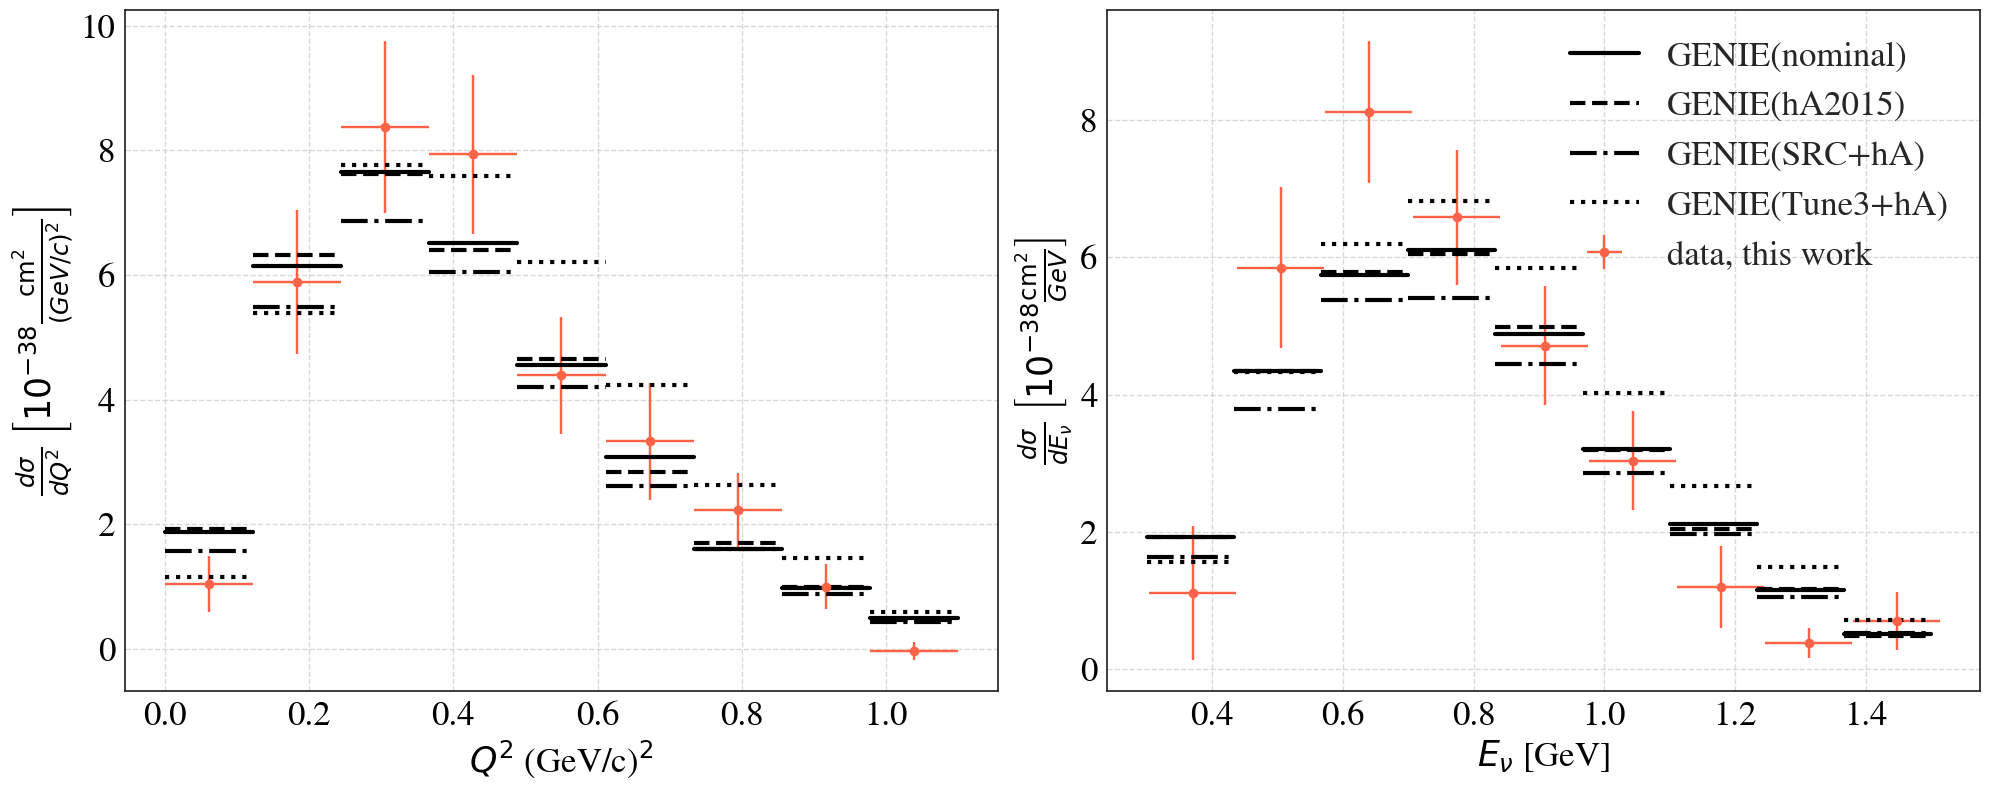

In [27]:
wname = 'Pmu weight'
fig = plt.figure(figsize=(20,8))
for ivar,(var,vtrue,
          vlabel,units,xlabel,
          bins) in enumerate(zip(['reco_Q2_mcs','reco_Ev_mcs'],
                                                        [r'truth_Q2',r'truth_Ev'],
                                                        [r'Q^{2}',r'E_{\nu}'],
                                                        [r'(GeV/c)^{2}',r'GeV'],
                                                        [r'$Q^{2}$ (GeV/c)$^{2}$',r'$E_{\nu}$ [GeV]'],
                                                        [linspace(0.,1.1,10),linspace(0.3,1.5,10)])):
    ax = fig.add_subplot(1,2,ivar+1)

    mid = 0.5*(bins[1:]+bins[:-1]); bin_width=bins[1:] - bins[:-1]
    Xsec_dict = get_Xsec_variable(debug=debug,
                                  var=var,bins=bins,wname=wname,remove_ctu_bin=True,                                  
                                  selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                                  
                                  selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p)    

    h = dict()    
    h['Xsec'],h['Xsec err'] = Xsec_dict[var],Xsec_dict[var+' err']        
    ax.errorbar(x=mid*(1+0.01*ivar),xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',
                label='data, this work') 
    for gname,glabel,ls in zip(genie_list,genie_labels,['-','--','-.',':']):#{
        genie_model = afro_genie_CC1p_dict[gname]
        genie_model = genie_model[genie_model['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        h_genie,_ = np.histogram(genie_model[vtrue],bins=bins)
        h_genie_err = np.sqrt(h_genie)
        genie_Xsec,genie_Xsec_err = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
        for i_bin in range(len(bins)-1):#{
            genie_Xsec[i_bin],genie_Xsec_err[i_bin] = compute_Xsec(Non=h_genie[i_bin]*4.908e19/4.9e20,  
                                                                   Non_err=h_genie_err[i_bin]*4.908e19/4.9e20,                                                                               
                                                                   bin_width=(bins[1]-bins[0]) )
        #}
        mystep(x=mid ,x_width=bin_width, y=genie_Xsec, y_width=genie_Xsec_err,
               color='black',linestyle=ls,label=glabel,linewidth=3, ax=ax)
    #}
    set_axes(ax,x_label=xlabel        
             ,y_label=get_Xsec_label(vlabel,units)              
             ,do_add_grid=True
             ,do_add_legend=True if ivar==1 else False
             ,legend_loc='best')        
plt.tight_layout()    
outfilename = figures_path + 'Q2_Ev_Xsec.pdf'    
save_figure(outfilename)

# standard cross-sections with stat. unc.

In [7]:
def draw_Xsec(particle='mu',do_last_ctu_bin=False,do_add_afro_genie=True):
    filename=Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt";print'loading',filename
    with open(filename, 'rb') as infile:#{
        Xsec_dicts = pickle.load(infile)
    #}
    Sigmas_Summary = dict()
    for iXsec,(Xsec_title,Xsec_fname,do_draw_Xsecs) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames,[True,do_last_ctu_bin])):#{
        if do_draw_Xsecs==False: continue
        fig=plt.figure(figsize=(24,8))            
        Xsec_dict = Xsec_dicts[Xsec_title]            
        for ivar,observable in enumerate(['P'+particle,'cos(theta('+particle+'))']):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            mul=1
            ax = fig.add_subplot(1,2,ivar+1)            
            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay')            
            set_axes(ax,xlabel,y_label=get_Xsec_label(vlabel,units)
                             ,do_add_grid=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                             ,ylim=(0,1.1*np.max(ax.get_ylim())))
            plt.title(Xsec_title, y=1.02,fontsize=25)            
        plt.tight_layout(h_pad=0)
        save_figure(figures_path + 'Xsec_1D_'+particle+'_'+Xsec_fname+'_statisitcal_uncertainties_only.pdf')

loading /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PmuXsecs_1D.txt
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/paper-CCQEXSec/Figures/overlay_v8.11/Xsec_1D_mu_without_last_ctu_bin_statisitcal_uncertainties_only.pdf


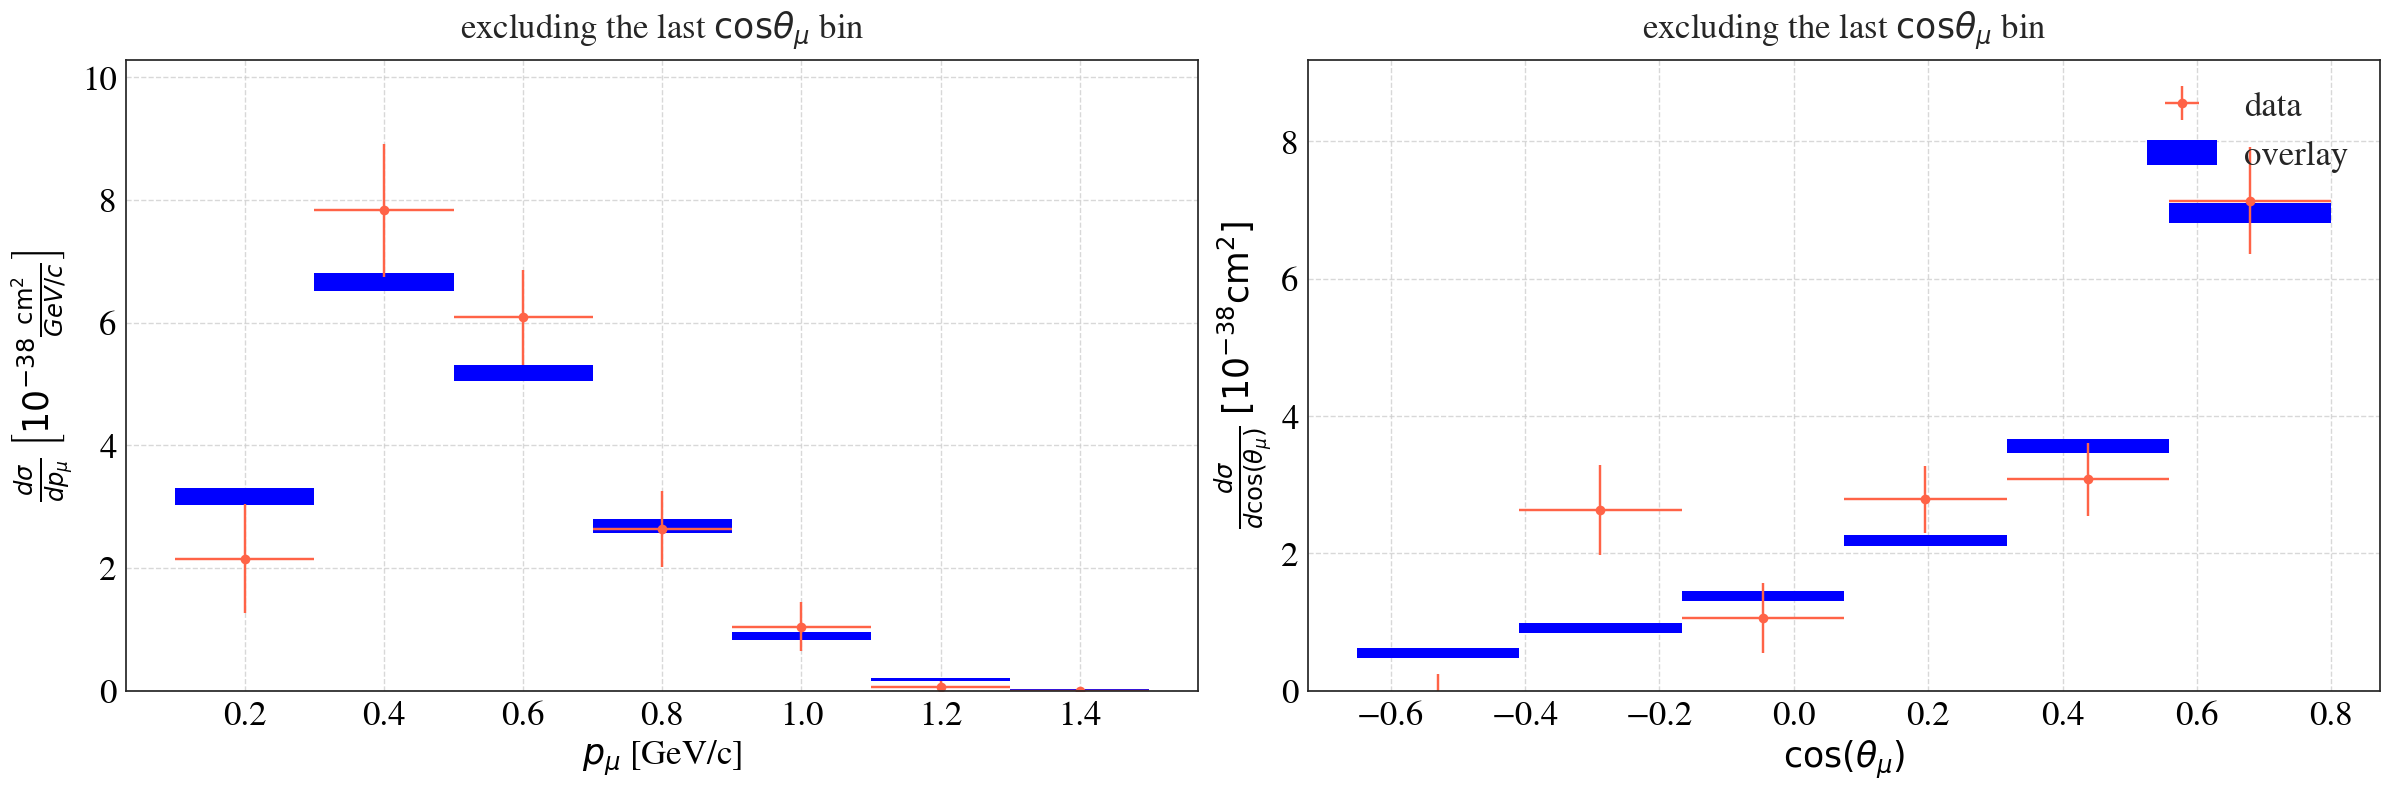

In [8]:
draw_Xsec(particle='mu',do_last_ctu_bin=False)

loading /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PpXsecs_1D.txt
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/paper-CCQEXSec/Figures/overlay_v8.11/Xsec_1D_p_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/paper-CCQEXSec/Figures/overlay_v8.11/Xsec_1D_p_with_last_ctu_bin.pdf


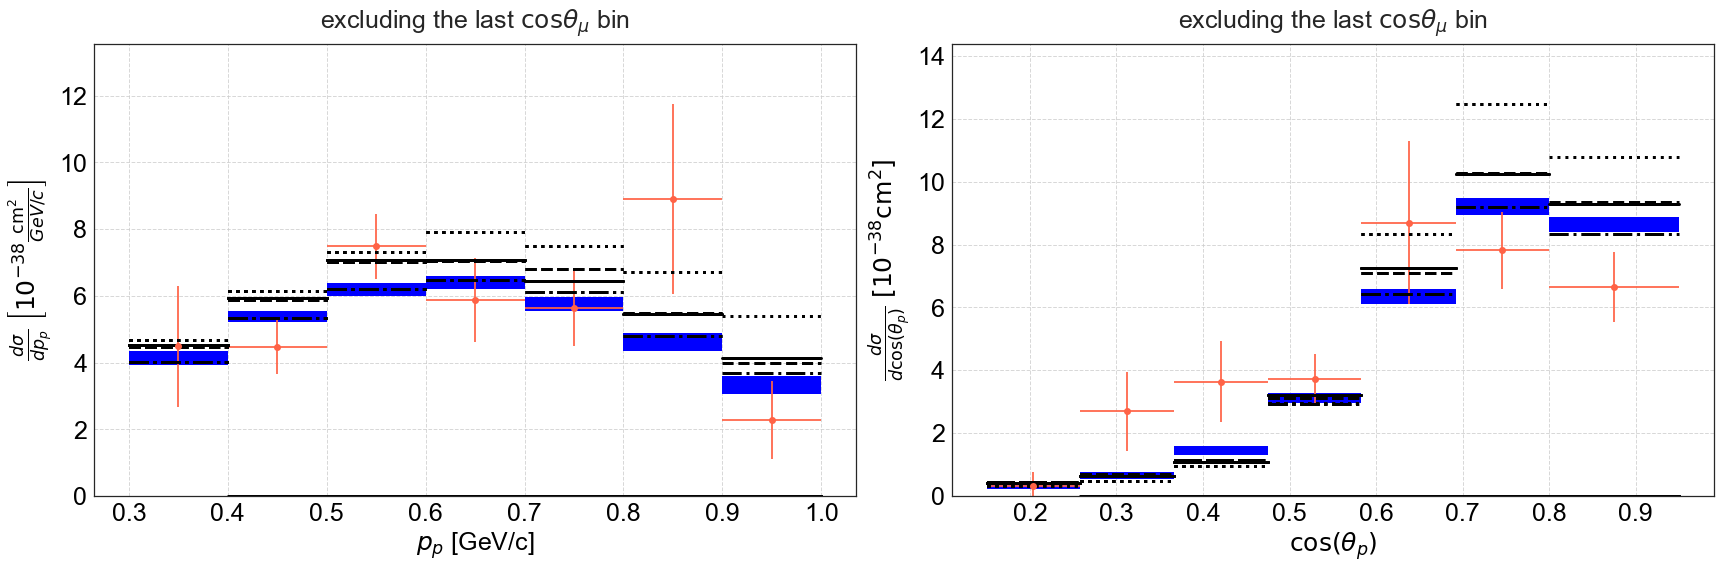

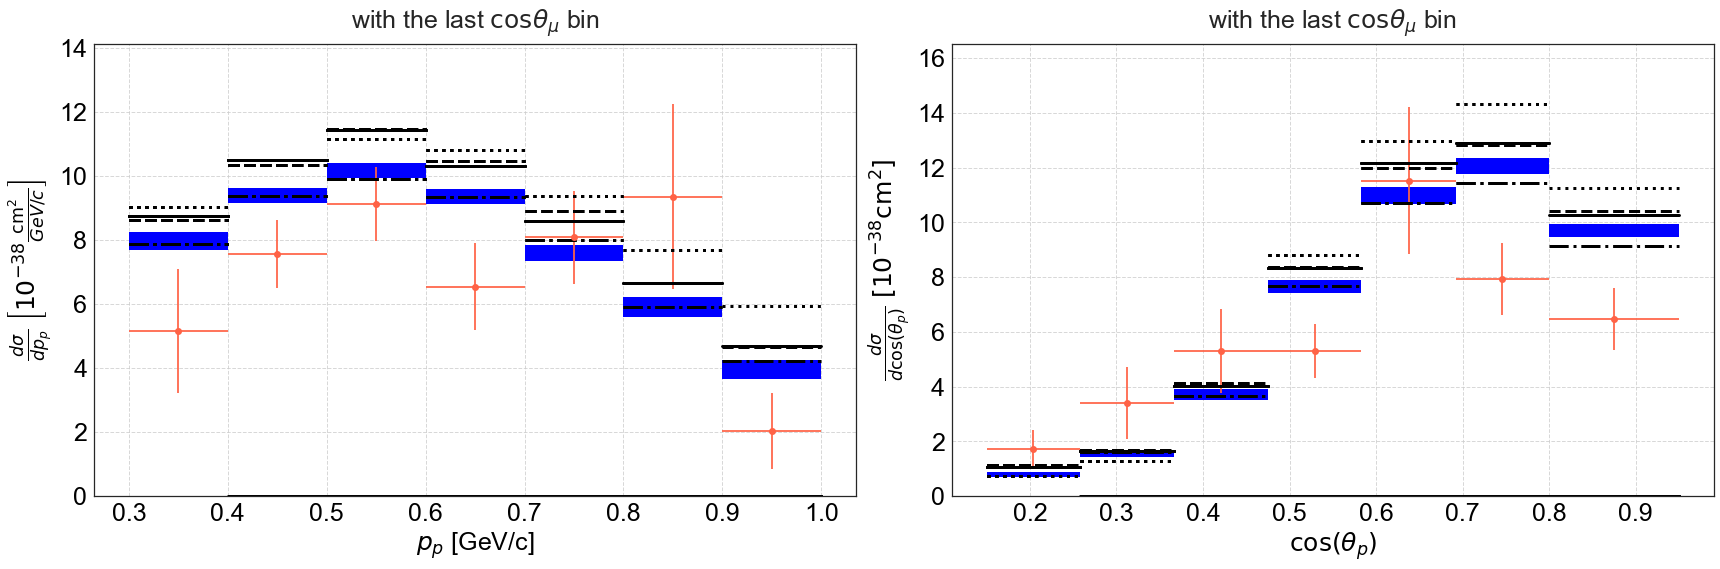

In [45]:
draw_Xsec(particle='p',do_last_ctu_bin=True)

# $E_\nu$ in two methods: 
1. with only the muon
2. with our muon and proton

In [10]:
M_N = 0.93956 # GeV/c2
m_mu = 0.1056 # GeV/c2
E_B = 0.040 # binding energy in GeV
for sam in [selected_beam_on,selected_beam_off,selected_CC1p,selected_overlay_concat]:
    sam['reco_Ev_inclusive'] = (2*M_N*E_B + 2*M_N*sam['reco_Emu_mcs'] - m_mu*m_mu)/(2*(M_N - sam['reco_Emu_mcs'] + sam['reco_Pmu_mcs']*sam['reco_Pmu_cos_theta']))    
# plt.hist(nominal_genie['truth_Ev'],bins=bins)

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/paper-CCQEXSec/Figures/overlay_v8.11/Ev_different_Xsec.pdf


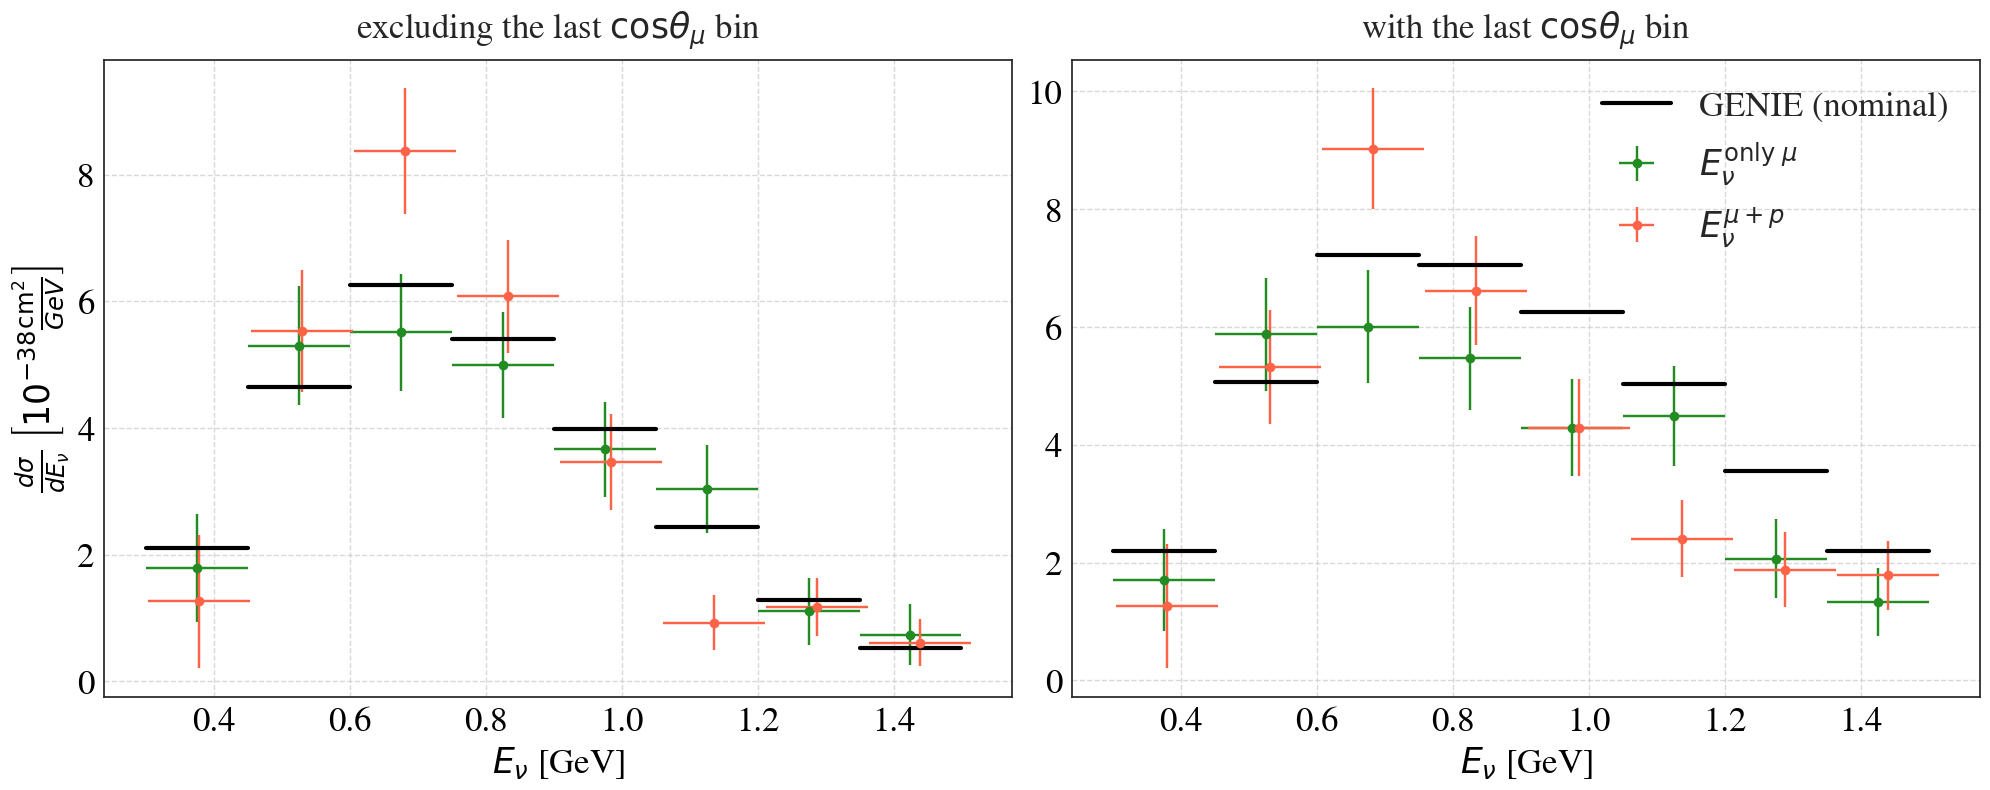

In [17]:
bins=linspace(0.3,1.5,9)
vlabel=r'E_{\nu}'; units='GeV'
wname = 'Pmu weight'
fig,axes = plt.subplots(1,2,figsize=(20,8))
mid = 0.5*(bins[1:]+bins[:-1]); bin_width=bins[1:] - bins[:-1]
for ivar,(var,varlabel,color) in enumerate(zip(['reco_Ev_inclusive','reco_Ev_mcs'],                                 
                                               [r'$E_{\nu}^{\mathrm{only } \; \mu}$',r'$E_{\nu}^{\mu + p}$'],['forestgreen',Colors['beam on']])):
    Xsec_dicts = dict()
    for Xsec_ctu_title,remove_ctu_bin in zip(Xsec_ctu_titles,remove_ctu_bools):
        Xsec_dicts[Xsec_ctu_title] = get_Xsec_variable(debug=debug,
                                                       var=var,bins=bins,
                                                       wname=wname,
                                                       remove_ctu_bin=remove_ctu_bin,
                                                       selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,
                                                       selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p)    
    for iXsec,(Xsec_ctu_title) in enumerate(Xsec_ctu_titles):
        Xsec_dict = Xsec_dicts[Xsec_ctu_title]
        h = dict()
        h['Xsec'],h['Xsec err'] = Xsec_dict[var],Xsec_dict[var+' err']
        ax = axes[iXsec]
        ax.errorbar(x=mid*(1+0.01*ivar),xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=color,fmt='o',label=varlabel)        
        # h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+var], Xsec_dict['mc '+var+' err']
        # ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=color)
    
for iXsec,(Xsec_ctu_title) in enumerate(Xsec_ctu_titles):
    ax = axes[iXsec]   
    nominal_genie = afro_genie_CC1p_dict['nominal']
    if 'excluding' in Xsec_ctu_title: #{
        nominal_genie = nominal_genie[nominal_genie['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
    #}    
    h_genie,_ = np.histogram(nominal_genie['truth_Ev'],bins=bins)
    h_genie_err = np.sqrt(h_genie)
    genie_Xsec,genie_Xsec_err = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
    for i_bin in range(len(bins)-1):#{
        genie_Xsec[i_bin],genie_Xsec_err[i_bin] = compute_Xsec(Non=h_genie[i_bin]*4.908e19/4.9e20,  
                                                               Non_err=h_genie_err[i_bin]*4.908e19/4.9e20,                                                                               
                                                               bin_width=(bins[1]-bins[0]) )
    #}
    mystep(x=mid ,x_width=bin_width, y=genie_Xsec, y_width=genie_Xsec_err, color='black',linestyle='-',label='GENIE (nominal)',linewidth=3, ax=ax)
    
    set_axes(ax,x_label='$'+vlabel+'$' + r' [%s]'%units
                 ,y_label=get_Xsec_label(vlabel,units) if iXsec==0 else ''
                 ,do_add_grid=True,do_add_legend=True if iXsec==1 else False, legend_loc='best'
                 ,title=Xsec_ctu_title)        
plt.tight_layout()    
outfilename = figures_path + 'Ev_different_Xsec.pdf'    
save_figure(outfilename)

# playground to find the optimal $E_\nu$ plot

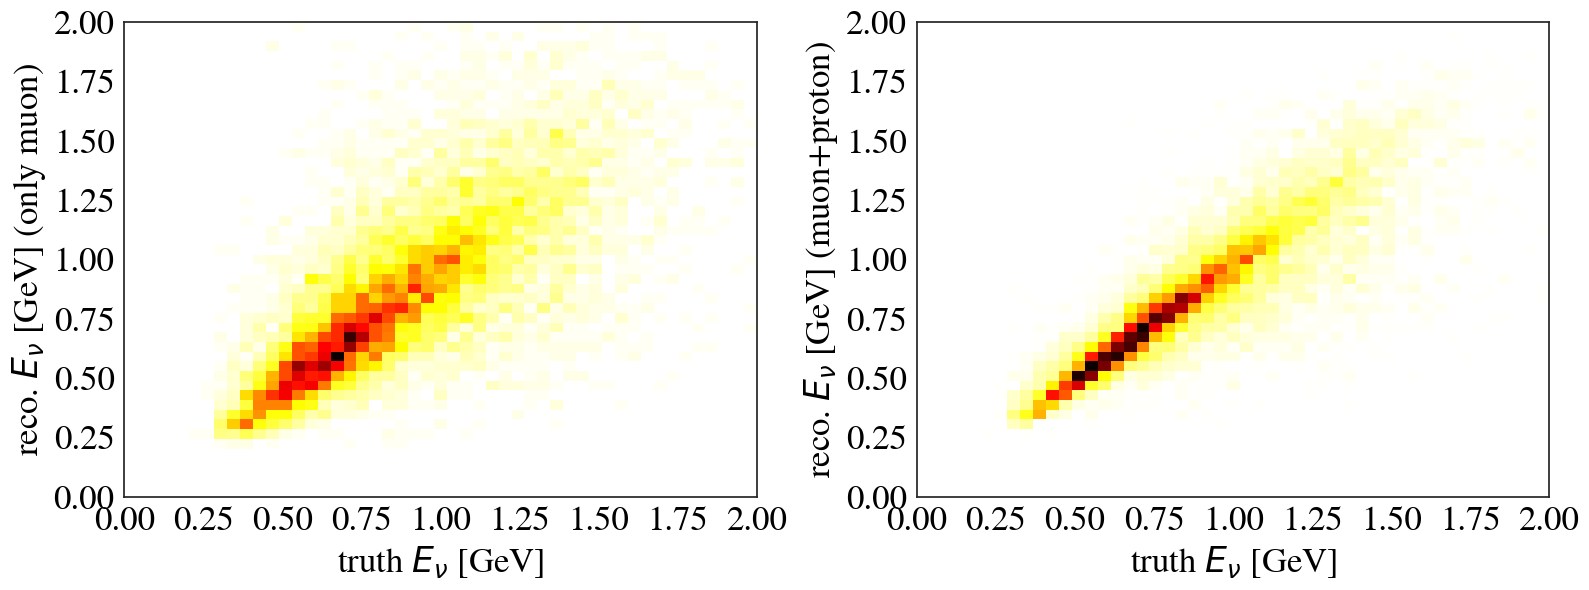

In [16]:
fig=plt.figure(figsize=(16,6))
plot_2d_hist(selected_CC1p['closest_genie_Ev'],selected_CC1p['reco_Ev_inclusive'],bins=linspace(0,2,50),ax=fig.add_subplot(1,2,1),xlabel=r'truth $E_\nu$ [GeV]',ylabel=r'reco. $E_\nu$ [GeV] (only muon)');
plot_2d_hist(selected_CC1p['closest_genie_Ev'],selected_CC1p['reco_Ev_mcs'],bins=linspace(0,2,50),ax=fig.add_subplot(1,2,2),xlabel=r'truth $E_\nu$ [GeV]',ylabel=r'reco. $E_\nu$ [GeV] (muon+proton)')
plt.tight_layout()

comparing in bin 0  at 0.3 h1: 1.648271+/-1.088596, h2: 2.810543+/-0.159809
num = 1.350876 den = 1.210581
chi2 this bin: num/den = 1.115890
chi2 : 1.1
comparing in bin 1  at 0.39375 h1: 5.933012+/-1.578229, h2: 6.651192+/-0.247591
num = 0.515783 den = 2.552109
chi2 this bin: num/den = 0.202101
chi2 : 0.2
comparing in bin 2  at 0.4875 h1: 11.741666+/-1.790334, h2: 8.599794+/-0.279738
num = 9.871361 den = 3.283549
chi2 this bin: num/den = 3.006309
chi2 : 3.0
comparing in bin 3  at 0.58125 h1: 9.126822+/-1.895152, h2: 7.688366+/-0.264066
num = 2.069156 den = 3.661331
chi2 this bin: num/den = 0.565138
chi2 : 0.6
comparing in bin 4  at 0.675 h1: 6.222616+/-1.224078, h2: 5.904965+/-0.218334
num = 0.100902 den = 1.546038
chi2 this bin: num/den = 0.065265
chi2 : 0.1
comparing in bin 5  at 0.76875 h1: 3.823871+/-0.961033, h2: 4.322274+/-0.188120
num = 0.248406 den = 0.958973
chi2 this bin: num/den = 0.259033
chi2 : 0.3
comparing in bin 6  at 0.8625 h1: 3.094152+/-0.935437, h2: 2.154313+/-0.1373

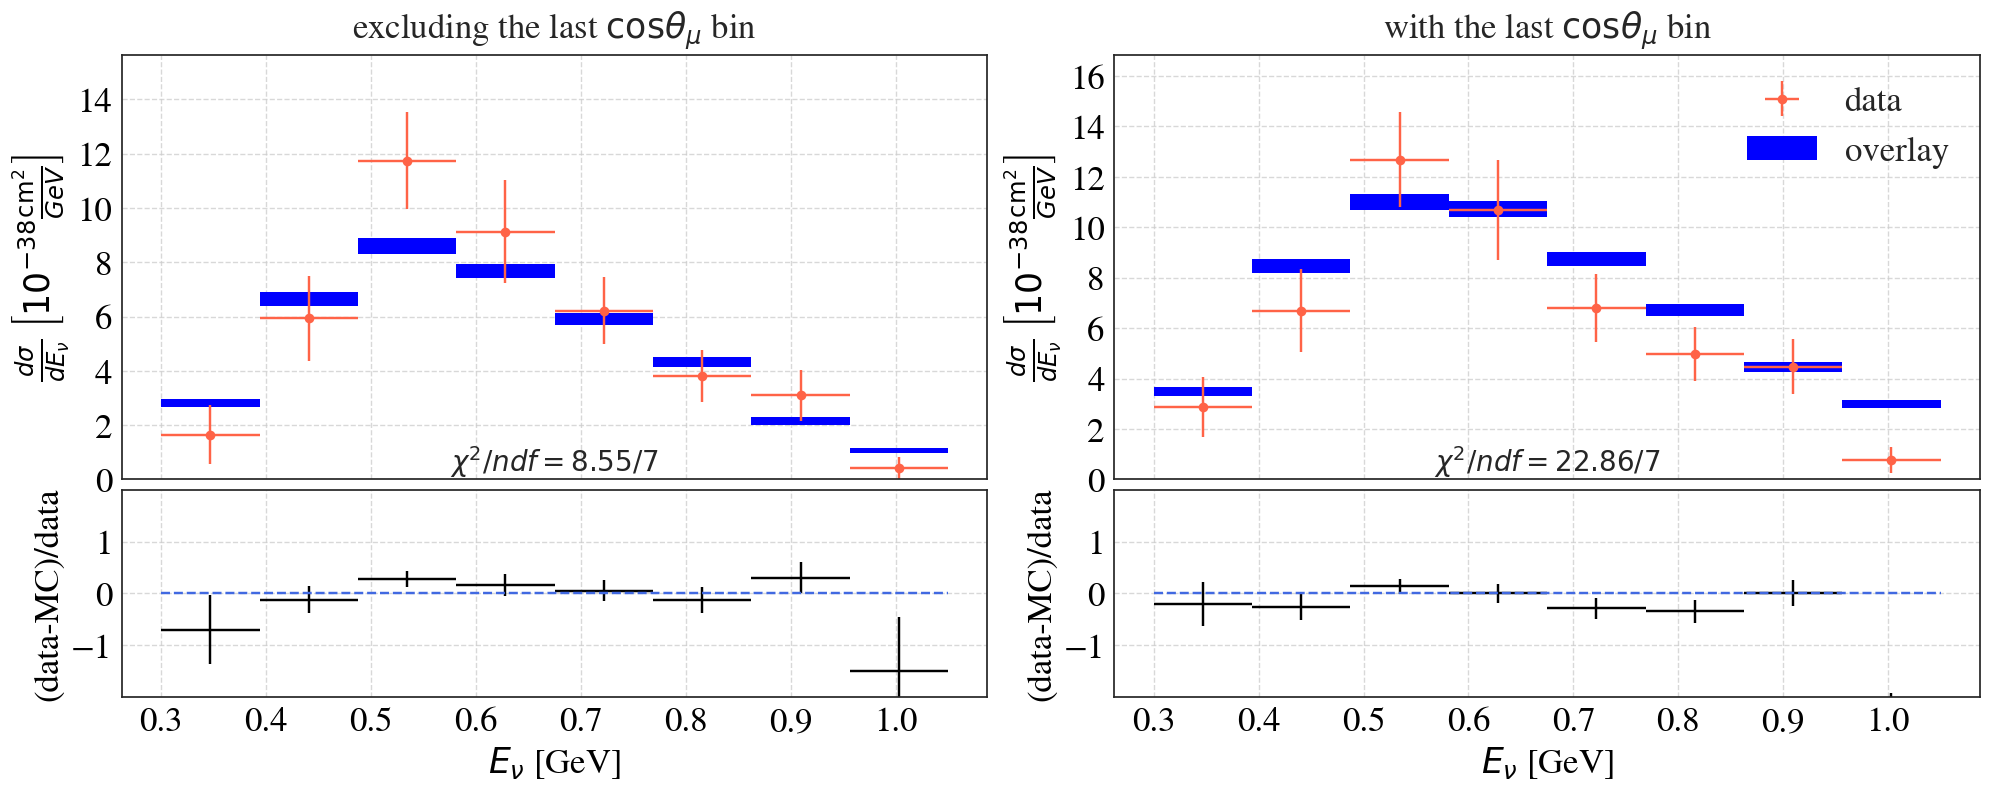

In [19]:
draw_Xsec_variable(var='reco_Ev',bins=linspace(0.3,1.05,9),vlabel=r'E_{\nu}',units='GeV',figures_path=figures_path,
                   wname='Pmu weight',
                   residuals_ylim=[-2,2],residuals_yticks=[-1,0,1],residuals_xtitle='center',
                   selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                           
                   selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0
                  );

comparing in bin 0  at 0.3 h1: 6.525210+/-1.436647, h2: 6.749896+/-0.243654
num = 0.050484 den = 2.123322
chi2 this bin: num/den = 0.023776
chi2 : 0.0
comparing in bin 1  at 0.39375 h1: 8.992880+/-1.493880, h2: 7.162817+/-0.248084
num = 3.349130 den = 2.293222
chi2 this bin: num/den = 1.460447
chi2 : 1.5
comparing in bin 2  at 0.4875 h1: 7.876324+/-1.321531, h2: 6.834387+/-0.249067
num = 1.085632 den = 1.808478
chi2 this bin: num/den = 0.600302
chi2 : 0.6
comparing in bin 3  at 0.58125 h1: 4.266424+/-1.112913, h2: 5.813216+/-0.231938
num = 2.392565 den = 1.292372
chi2 this bin: num/den = 1.851298
chi2 : 1.9
comparing in bin 4  at 0.675 h1: 5.779132+/-1.280348, h2: 4.168277+/-0.183629
num = 2.594854 den = 1.673011
chi2 this bin: num/den = 1.551008
chi2 : 1.6
comparing in bin 5  at 0.76875 h1: 3.880878+/-1.105800, h2: 3.064594+/-0.176098
num = 0.666318 den = 1.253804
chi2 this bin: num/den = 0.531437
chi2 : 0.5
comparing in bin 6  at 0.8625 h1: 2.166472+/-1.533816, h2: 1.755584+/-0.11920

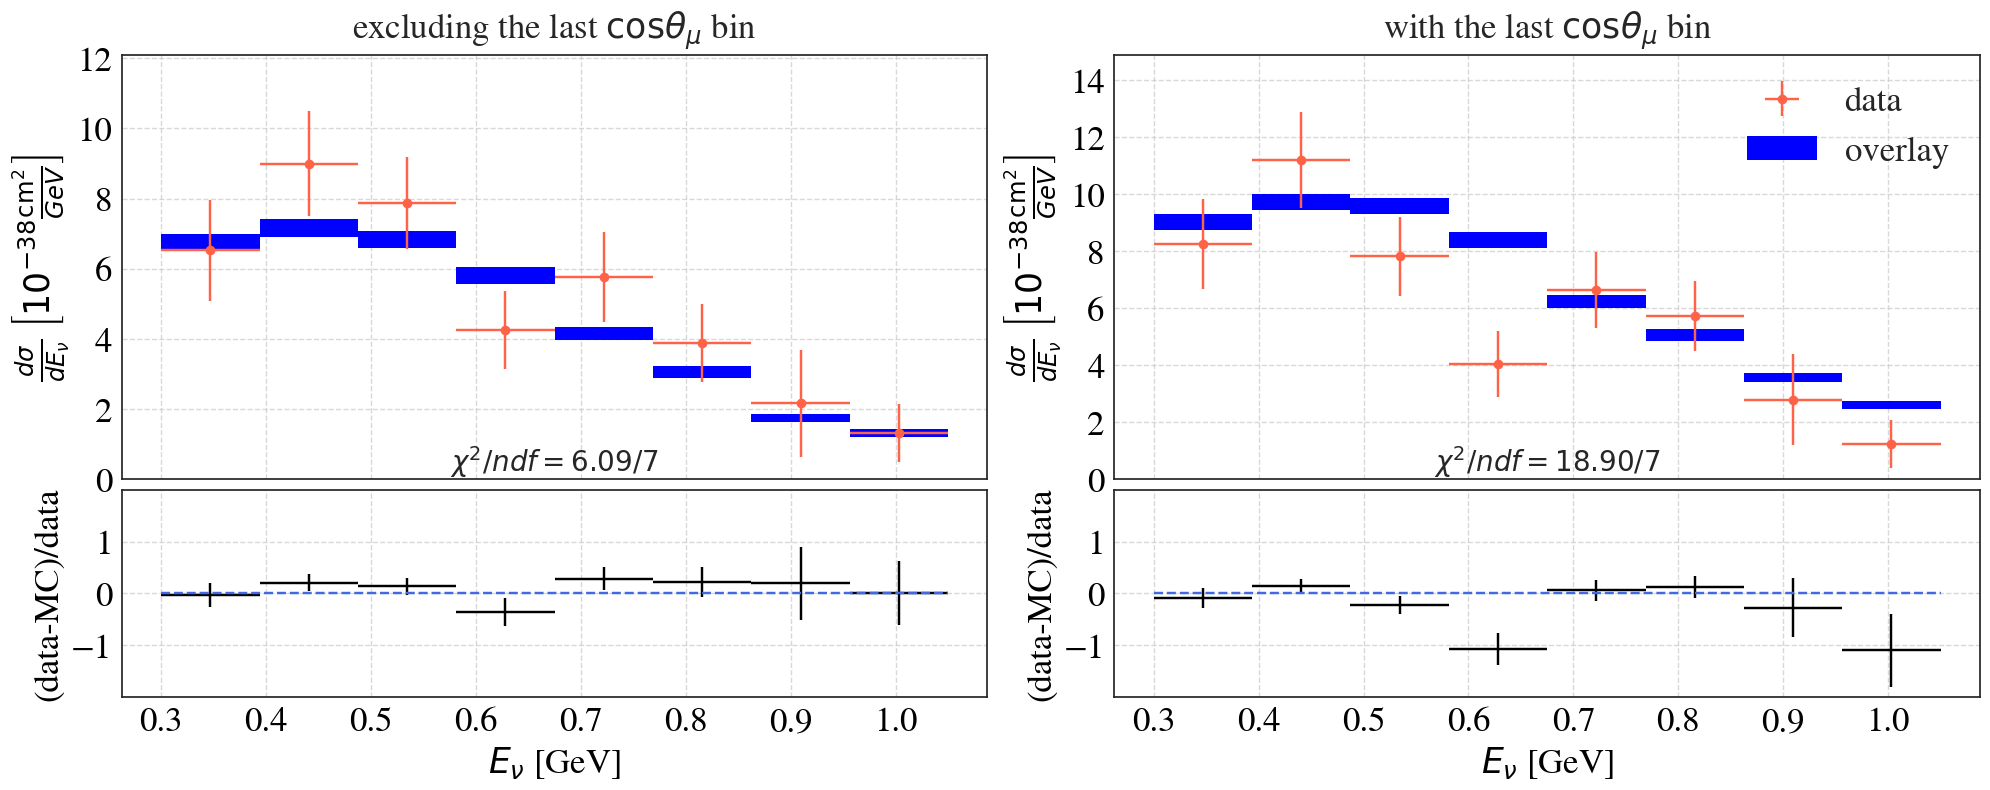

In [20]:
draw_Xsec_variable(var='reco_Ev_inclusive',bins=linspace(0.3,1.05,9),vlabel=r'E_{\nu}',units='GeV',figures_path=figures_path,
                   wname='Pmu weight',
                   residuals_ylim=[-2,2],residuals_yticks=[-1,0,1],residuals_xtitle='center',
                   selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                           
                   selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0
                  );